# 머신러닝 모델
- 결정트리, 랜덤포레스트, kNN, 나이브 베이즈, 선형모델, SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [71]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

# 데이터

- 유방암 데이터

In [3]:
cancer = load_breast_cancer() 
type(cancer)

sklearn.utils.Bunch

In [4]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
y = cancer.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 데이터 탐색

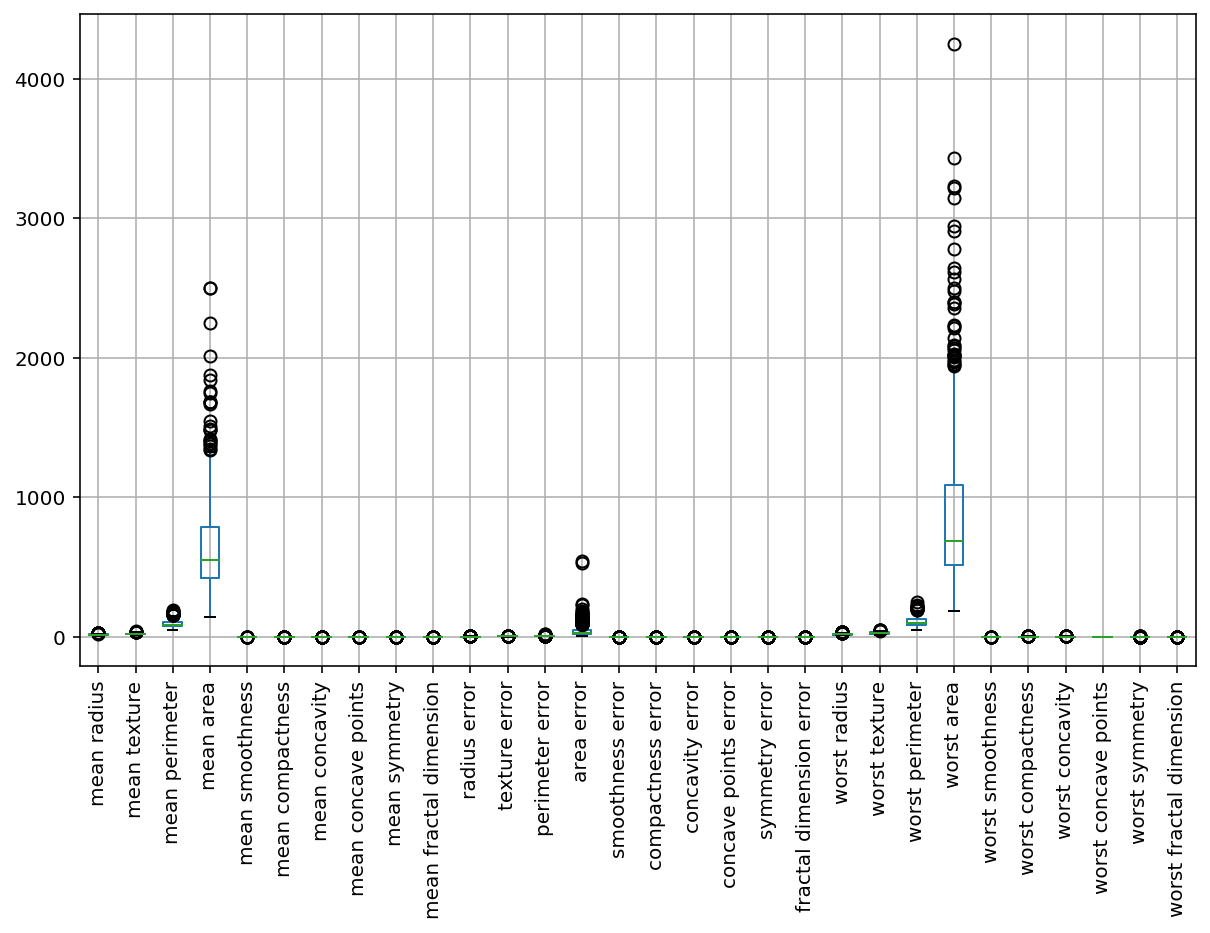

In [11]:
plt.figure(figsize=(10,6))
X.boxplot()
plt.xticks(rotation=90)
plt.show()

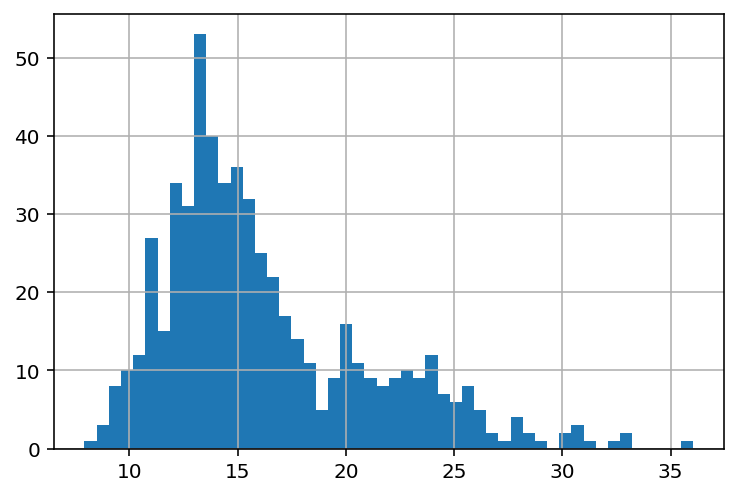

In [12]:
X['worst radius'].hist(bins=50)

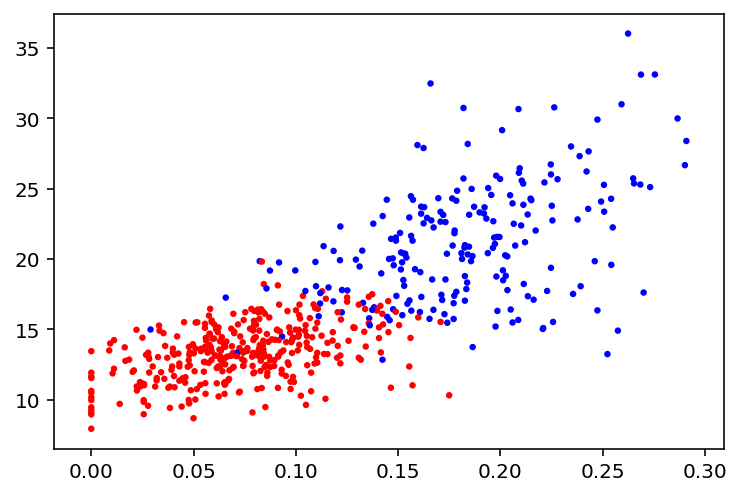

In [13]:
plt.scatter(X['worst concave points'],X['worst radius'], c=y, cmap='bwr',s=5)

## 결정트리를 이용한 분류

In [55]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf = DecisionTreeClassifier() # (1)
clf.fit(X_train, y_train) # (2)
print(clf.score(X_test, y_test)) # accuracy

0.9370629370629371


In [58]:
from sklearn.model_selection import KFold
cv = KFold(5)
# cross_val_score(clf, X, y, cv=cv)
cross_val_score(clf, X, y, cv=cv).mean().round(4)

0.9033

## 특성 중요도

In [7]:
clf.feature_importances_.round(3)

array([0.007, 0.043, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.019, 0.   , 0.   ,
       0.009, 0.   , 0.712, 0.059, 0.   , 0.   , 0.   , 0.021, 0.011,
       0.116, 0.   , 0.   ])

In [8]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })
df[:10]

,feature,importance
0,mean radius,0.007389
1,mean texture,0.043044
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.000000
8,mean symmetry,0.000000
9,mean fractal dimension,0.000000


In [9]:
df=df.sort_values('importance', ascending=False) 
df[:10]

,feature,importance
20,worst radius,0.711625
27,worst concave points,0.115708
21,worst texture,0.059071
1,mean texture,0.043044
25,worst compactness,0.021073
15,compactness error,0.018815
26,worst concavity,0.010635
18,symmetry error,0.009318
0,mean radius,0.007389
13,area error,0.003323


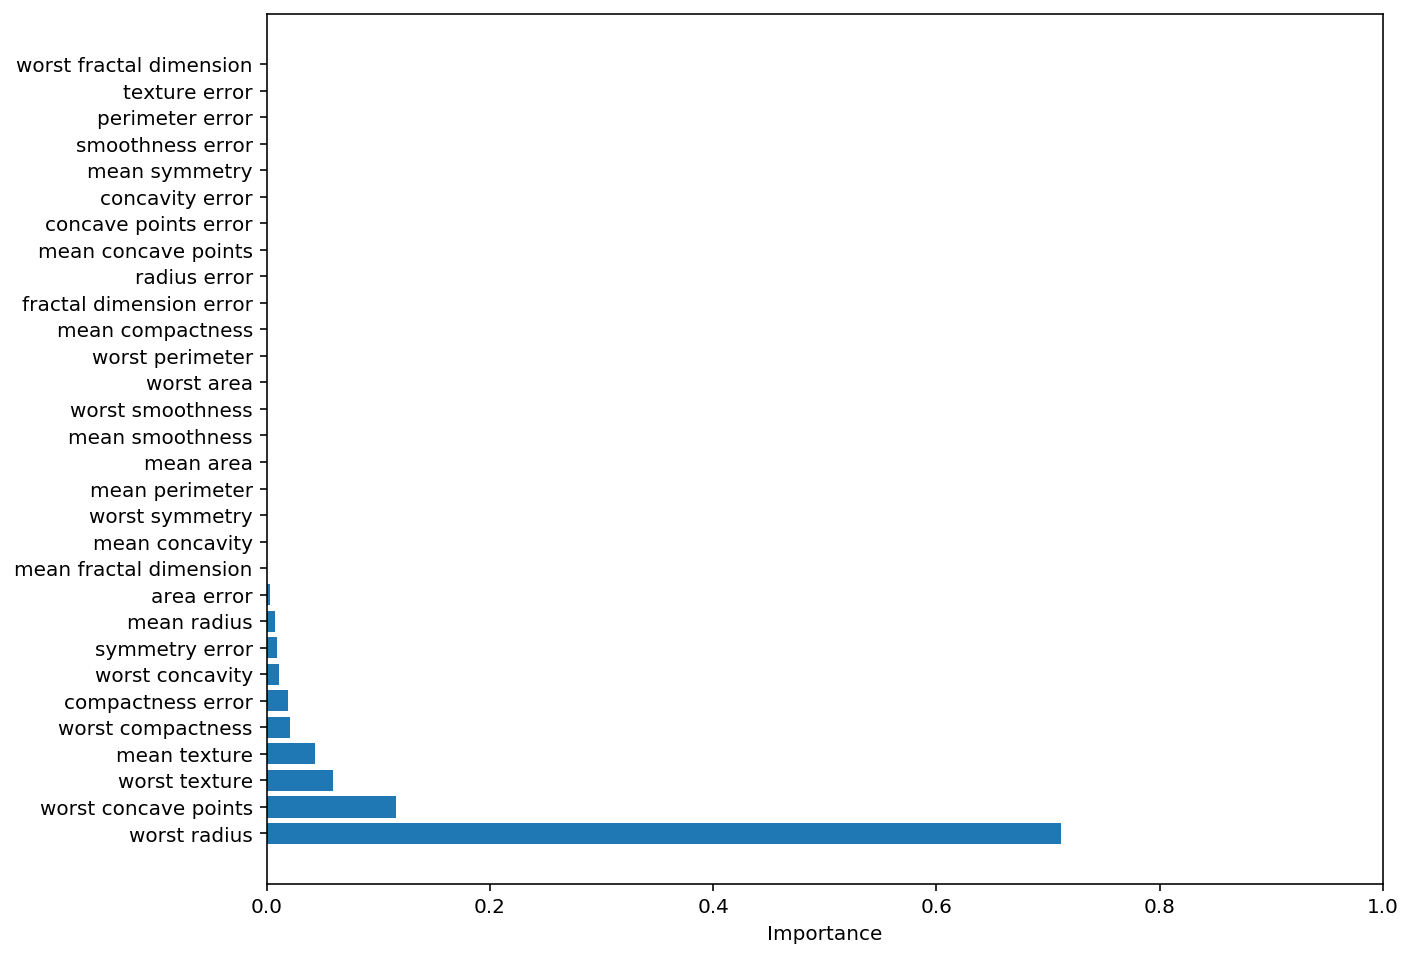

In [10]:
feat = df.feature
ypos = np.arange(len(feat))
plt.figure(figsize=(10,8)) 
plt.barh(feat, df.importance) 
plt.yticks(ypos, feat) 
plt.xlim(0,1)
plt.xlabel('Importance') 
plt.show()

# 랜덤 포레스트
- 결정 트리의 성능을 개선한 방법
- 간단한 구조의 결정 트리(weak learner)를 수십~수백개를 만들고 각 결정 트리의 동작 결과의 평균치를 구하는 방법
- 앙상블(ensemble) 방법이 하나의 모델만 만드는 것보다 좋은 성능을 보인다
- 각 결정 트리를 만들 때 훈련 데이터의 일부만 사용하거나 특성의 일부를 무작위로 선택하여 만든다 
- 앙상블의 갯수: n_estimators

- 랜덤 포레스트 개념

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.52.png?raw=1" align='left'  width=400>

### 소프트 투표

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.52.18.png?raw=1" align='left'  width=400>

0.9790209790209791


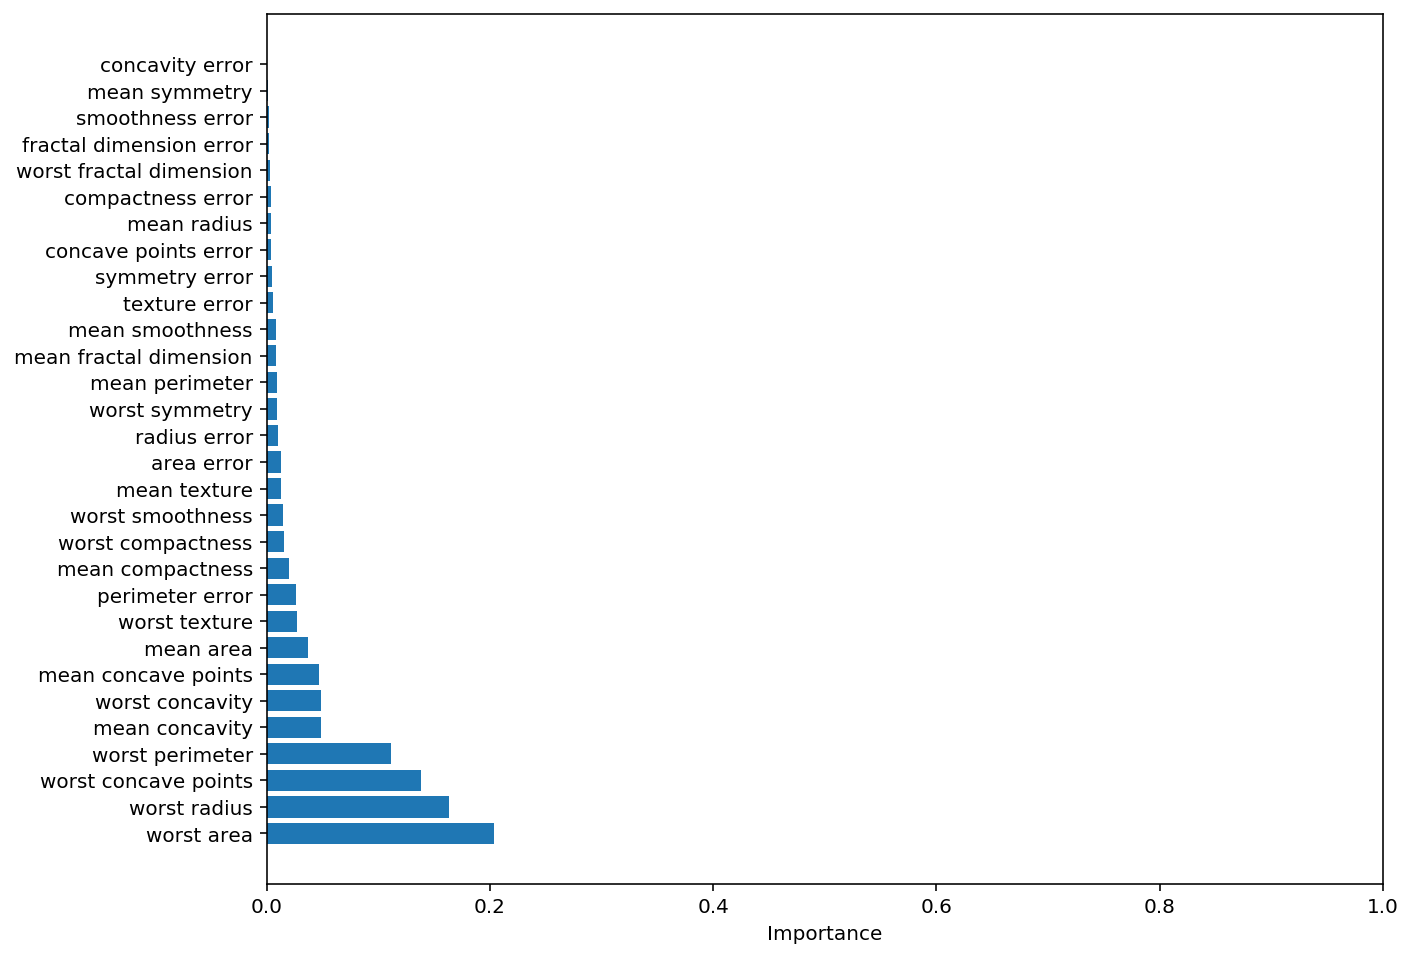

In [42]:
rfc = RandomForestClassifier(n_estimators=20, random_state=99)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

df = pd.DataFrame({'feature':cancer.feature_names,'importance':rfc.feature_importances_ })
df =df.sort_values('importance', ascending=False)

feat = df.feature
ypos = np.arange(len(feat))
plt.figure(figsize=(10,8)) 
plt.barh(feat, df.importance) 
plt.yticks(ypos, feat) 
plt.xlim(0,1)
plt.xlabel('Importance') 
plt.show()

In [45]:
# cross_val_score(clf, X, y, cv=cv)
cross_val_score(rfc, X, y, cv=cv).mean().round(4)

0.9631

# kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("K=", i, ": {:.2f}".format(knn.score(X_test, y_test)))

K= 1 : 0.89
K= 2 : 0.89
K= 3 : 0.92
K= 4 : 0.94
K= 5 : 0.94
K= 6 : 0.94
K= 7 : 0.93
K= 8 : 0.94
K= 9 : 0.92
K= 10 : 0.92
K= 11 : 0.92
K= 12 : 0.92
K= 13 : 0.92
K= 14 : 0.92
K= 15 : 0.93
K= 16 : 0.93
K= 17 : 0.93
K= 18 : 0.93
K= 19 : 0.92


In [62]:
for i in range(1,50,3):
    knn = KNeighborsClassifier(n_neighbors=i)
    print("K=", i, ": {:.2f}".format(cross_val_score(knn, X, y, cv=cv).mean().round(4)))

K= 1 : 0.91
K= 4 : 0.92
K= 7 : 0.92
K= 10 : 0.93
K= 13 : 0.93
K= 16 : 0.92
K= 19 : 0.92
K= 22 : 0.92
K= 25 : 0.91
K= 28 : 0.91
K= 31 : 0.91
K= 34 : 0.91
K= 37 : 0.91
K= 40 : 0.91
K= 43 : 0.91
K= 46 : 0.91
K= 49 : 0.91


# 나이브 베이즈
- 다항 나이브 베이즈 분류 함수, MultinomialNB

In [73]:
nb_clf = MultinomialNB()
cross_val_score(knn, X, y, cv=cv).mean().round(4)

0.9192

# SVM

In [68]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear")
cross_val_score(svm_clf, X, y, cv=cv).mean().round(4)

0.9525

##  그리드 탐색

<img src="
https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.21.02.png?raw=1" aligh='left' width=350>

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection, svm, metrics
#그리드 서치의 매개변수를 설정한다(C, gamma)
params = [{"C": [1,10,100,1000,10000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]

clf = GridSearchCV(svm.SVC(), params, n_jobs=-1 )
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

#테스트 데이터로 최종 평가
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

최적값 : SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
최적 score : 0.9577564979480165
최종 평가 = 0.958041958041958
